<a href="https://colab.research.google.com/github/wdwzyyg/ECE532Project/blob/main/Method3_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import h5py
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

In [ ]:
input_base = '/content/drive/MyDrive/ECE532/Project/Input/'
input_sub_folder = ['Food/','People/','Scenery/']    
result_path =  '/content/drive/MyDrive/ECE532/Project/Featurization Result/'

x_train_list = []
y_train_list = []

for current_folder in input_sub_folder:

  input_folder = input_base + current_folder

  for image in os.listdir(input_folder):
    if (current_folder == 'Food/'):
      label = 0
    else:
      if (current_folder == 'People/'):
        label = 1
      else:
        label = 2

    img = Image.open(input_folder + image)
    img = np.asarray(img,dtype=np.float64)[:,:,0]
    img_size = img.shape[0]
    sx, sy = img.shape[0], img.shape[1]
    new_channel = np.zeros((img_size, img_size))
    #img_stack = np.dstack((img, new_channel, new_channel)) # add channel axis
    #x_train_list.append(img_stack)
    x_train_list.append(img)
    y_train_list.append(label)

nb_train_samples = len(x_train_list)
print('Image loaded')
print('input shape: ')
print(sx, sy)
print('training number: ')
print(nb_train_samples)
x_train = np.asarray(x_train_list) # turn the list into array
y_train = to_categorical(y_train_list, num_classes=3) # turn into label vectors

Image loaded
input shape: 
100 100
training number: 
1632


Splitted train and test data...
Train data  : (1305, 100, 100)
Test data   : (327, 100, 100)
Train labels: (1305, 3)
Test labels : (327, 3)
Running Epoch 1
Running feedforward on testing data for epoch 1
Accuracy on testing Set for epoch 50 is 0.3486238532110092
Running Epoch 2
Running feedforward on testing data for epoch 2
Accuracy on testing Set for epoch 50 is 0.3486238532110092
Running Epoch 3
Running feedforward on testing data for epoch 3
Accuracy on testing Set for epoch 50 is 0.363914373088685
Running Epoch 4
Running feedforward on testing data for epoch 4
Accuracy on testing Set for epoch 50 is 0.3486238532110092
Running Epoch 5
Running feedforward on testing data for epoch 5
Accuracy on testing Set for epoch 50 is 0.3486238532110092
Running Epoch 6
Running feedforward on testing data for epoch 6
Accuracy on testing Set for epoch 50 is 0.3486238532110092
Running Epoch 7
Running feedforward on testing data for epoch 7
Accuracy on testing Set for epoch 50 is 0.3486238532110092


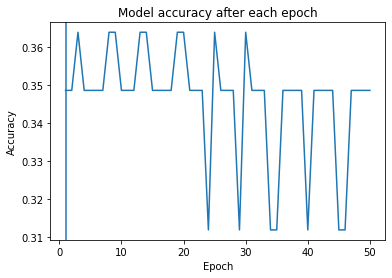

NameError: ignored

In [ ]:
weights = []
bias = []
layers_config = [10000, 500, 3]  #  to be determined
average_weights = []
average_bias = []
eta = 0.01                      # step?
epoch_accuracy = []

initialize_weights()


test_size = 0.2
(trainData, testData, trainLabels, testLabels) = train_test_split(x_train, y_train, test_size=test_size)
print ("Splitted train and test data...")
print ("Train data  : {}".format(trainData.shape))
print ("Test data   : {}".format(testData.shape))
print ("Train labels: {}".format(trainLabels.shape))
print ("Test labels : {}".format(testLabels.shape))


epoch_size = 50 ####
batch_size = 32 ####
batch_numbers = int(len(trainData)/batch_size)

#Single Sample Updates
shuffle_order = np.random.permutation(len(trainData))
for i in range(1, epoch_size + 1):
    print("Running Epoch {}".format(i))
    if i == 2:
        eta = eta/2
    if i == 3:
        eta = eta/2
    shuffle_order = np.random.permutation(len(trainData))
    for j in range(batch_numbers):
        for k in range(batch_size):
            shuffle_index = j * batch_size + k
            sample_x = trainData[shuffle_index,:]
            sample_y = trainLabels[shuffle_index, :]
            a_values = feedforward(sample_x)
            backprop(a_values, sample_y)
        for a in range(len(weights)):
            value_weight = weights[a]
            value_average_weight = np.multiply(average_weights[a], (eta/batch_size))
            weights[a] = np.subtract(value_weight, value_average_weight)
            value_bias = bias[a]
            value_average_bias = np.multiply(average_bias[a], (eta/batch_size))
            bias[a] = np.subtract(value_bias, value_average_bias)
    print("Running feedforward on testing data for epoch {}".format(i))
    y_output = np.array([feedforward(testData[m, :])[len(layers_config) - 1] for m in range(len(testData))])
    class_output = np.argmax(y_output, axis=1)
    label_class = np.argmax(testLabels, axis=1)
    number_correct_classification = np.sum(class_output == label_class)
    accuracy_val = number_correct_classification / len(testData)
    epoch_accuracy.append(accuracy_val)
    print("Accuracy on testing Set for epoch {} is {}".format(epoch_size, accuracy_val))

plt.plot(range(1, epoch_size + 1), epoch_accuracy)
plt.title('Model accuracy after each epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axvline(x=1)
plt.show()


output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()') # sound notification when finished

In [ ]:
len(trainData)

1305

## Aux function

In [ ]:
def ReLU(x):
    return np.maximum(0, x)

def ReLU_derivative(values):
    result = [1 if x > 0 else 0 for x in values]
    return result

def tanh_activation(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - (np.tanh(x) ** 2)

def Softmax(x):
    return np.exp(x - np.max(x))/(np.sum(np.exp(x - np.max(x))))

def feedforward(input_image):
    a = []
    a.append(input_image.reshape(len(input_image)**2,1))
    for i in range(1, len(layers_config)-1):
        a.append(ReLU((weights[i] @ a[i-1]).reshape(len(weights[i]), 1) + bias[i]))
    y_hat = Softmax((weights[-1] @ a[-1]) + bias[-1]).reshape(len(weights[-1]),)
    a.append(y_hat)
    return a

def backprop(a, ground_output_y):
    delta_error = list(np.empty_like(a))
    index_count = len(layers_config) - 1
    delta_error[index_count] = (a[index_count] - ground_output_y).reshape(len(a[index_count]), 1)
    average_bias[index_count] = average_bias[index_count] + delta_error[index_count] # Output Layer
    average_weights[index_count] = average_weights[index_count] + (delta_error[index_count] @ a[index_count - 1].T) # Output Layer
    for i in range(index_count - 1, 0, -1):
        h_derivative = np.array(ReLU_derivative(a[i])).reshape(1, len(a[i])) * np.eye(len(a[i]))
        delta_error[i] = h_derivative.T @ weights[i+1].T @ delta_error[i+1]
        average_bias[i] = average_bias[i] + delta_error[i]
        average_weights[i] = average_weights[i] + (delta_error[i] @ a[i-1].T)

# He Normalization
def initialize_weights():
    if len(layers_config) < 3:
        print("Incorrect network structure. Check the neural network layer configuration")
    else:
        layer_count = len(layers_config)
        weights.append([])
        bias.append([])
        average_weights.append([])
        average_bias.append([])
        for i in range(1, layer_count):
            neurons_previous = layers_config[i-1]
            neurons_current = layers_config[i]
            single_layer_weights = np.random.normal(0, np.sqrt(2/neurons_previous), (neurons_current, neurons_previous))
            single_layer_bias = np.random.normal(0, np.sqrt(2/neurons_previous), (neurons_current, 1))
            weights.append(single_layer_weights)
            bias.append(single_layer_bias)
            average_weights.append(single_layer_weights)
            average_bias.append(single_layer_bias)